# Lab 7
### Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [73]:
def Global(img):
    # maximum number of gray levels
    max_gray = int(np.max(img))
    # generating 1D array of size equal to max gray levels 
    freq = np.zeros((1,max_gray+1))[0]
    # np.arange makes array of max_gray -1 and we need bins to be max_gray +1 so we add 2
    freq = np.histogram(img,bins = np.arange(max_gray+2))[0]
    
    count =0
    total=0
    for i in range(freq.shape[0]):
        count = count + i*freq[i]
        total = total +freq[i]
    if(total==0):
        count=0
    else:
        count= count /(total)
    Tinit = round(count)
    Tprev=Tinit
    T=-1
    count = 0
    total =0
    while(Tprev != T):
        for i in range(int(Tprev)):
            count = count + i*freq[i]
            total= total + freq[i]
        if(total==0):
            count =0
        else:
            count = count/ total
        Tleft= round(count)
        count =0
        total =0
        for i in range(int(Tprev)+1,freq.shape[0]):
            count = count + i*freq[i]
            total = total +freq[i]
        if(total==0):
            count =0
        else:
            count = count/(total)
        Tright = round(count)
        if T!= -1:
            Tprev=T
        T = (Tright+Tleft)/2
        total =0
        count = 0
    Thresholded = np.copy(img)
    Thresholded[Thresholded>T]= 255
    Thresholded[Thresholded <=T] =0
    return  Thresholded
   

In [159]:
def local(img,n):
    if(len(img.shape) == 3):
        img = rgb2gray(img)*255
    else:
        img = rgb2gray(img)
    
    img = img.astype('uint8')
    x = img.shape[0]//2
    y = img.shape[1] // (n//2)
    lit = []
    index=0
    for i in range(n//2):
        if i == n//2:
            lit.append(img[:x,index:img.shape[1]])
            lit.append(img[x:img.shape[0],index:img.shape[1]])
        else:
            lit.append(img[:x,index:index+y])
            lit.append(img[x:img.shape[0],index:index+y])
        index = index+y+1
    index=0
    newlist=[]
    for i in range(len(lit)):
        newlist.append(Global(lit[i]))
    results = np.zeros(img.shape)
    for i in range(0,len(newlist),2):
        if i == len(newlist)-2:
            results[:x,index:img.shape[1]] += newlist[i]
            results[x:img.shape[0],index:img.shape[1]] += newlist[i+1]
        else:
            results[:x,index:index+y]+=newlist[i]
            results[x:img.shape[0],index:index+y] += newlist[i+1]
        index = index+y+1
               
    show_images([img,results])

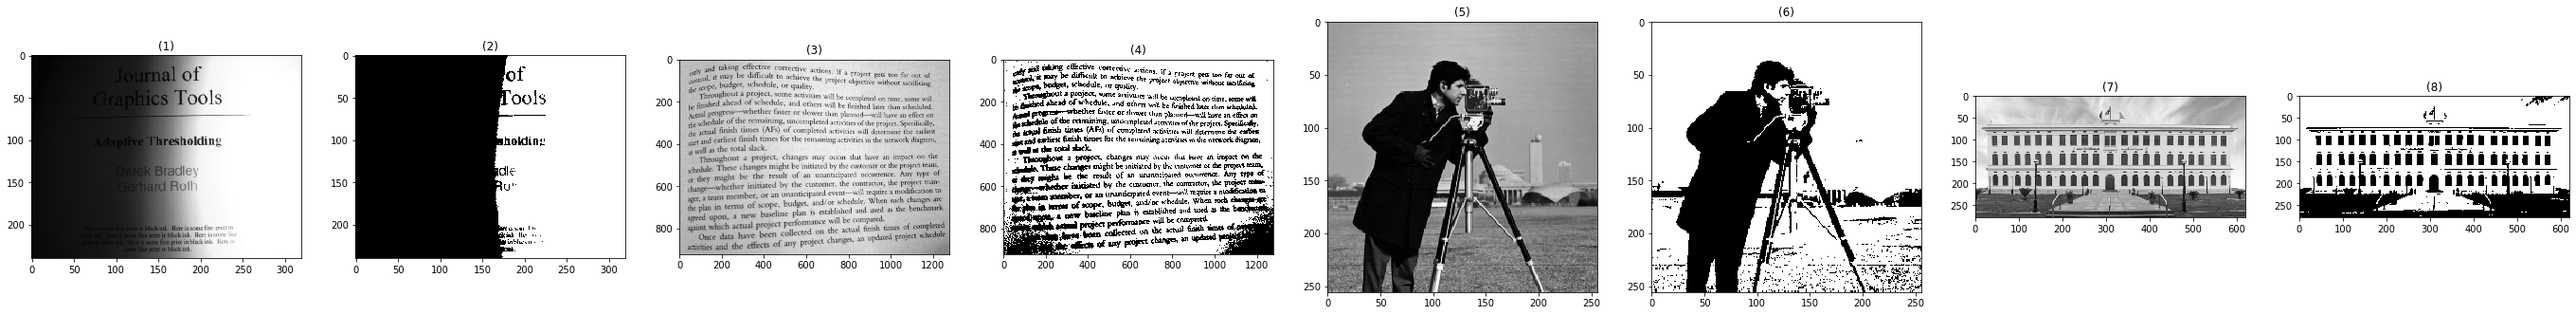

In [157]:
img1 = io.imread("book.png")
if(len(img1.shape) == 3):
    img1 = rgb2gray(img1)*255
else:
    img1 = rgb2gray(img1)

img1 = img1.astype('uint8')
img2 = io.imread("book1.png")
if(len(img2.shape) == 3):
    img2 = rgb2gray(img2)*255
else:
    img2 = rgb2gray(img2)

img2 = img2.astype('uint8')
img3 = io.imread("cameraman.png")
if(len(img3.shape) == 3):
    img3 = rgb2gray(img3)*255
else:
    img3 = rgb2gray(img3)

img3 = img3.astype('uint8')
img4 = io.imread("cufe.png")
if(len(img4.shape) == 3):
    img4 = rgb2gray(img4)*255
else:
    img4 = rgb2gray(img4)

img4 = img4.astype('uint8')

thres1=Global(img1)
thresh2=Global(img2)
thresh3= Global(img3)
thresh4= Global(img4)
show_images([img1,thres1, img2, thresh2, img3, thresh3, img4, thresh4])

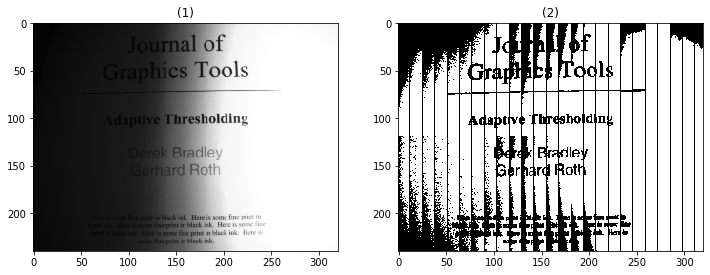

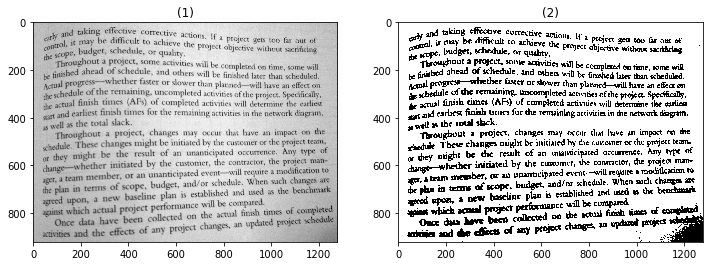

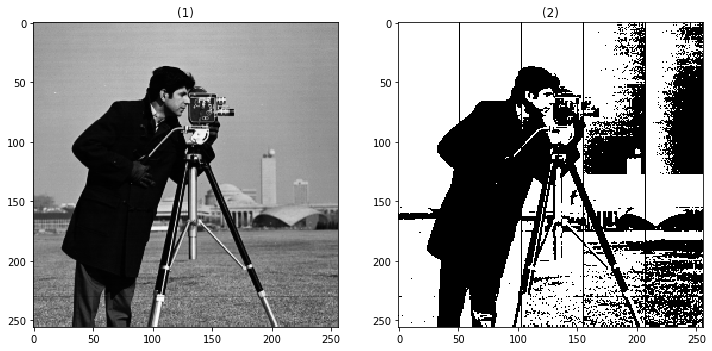

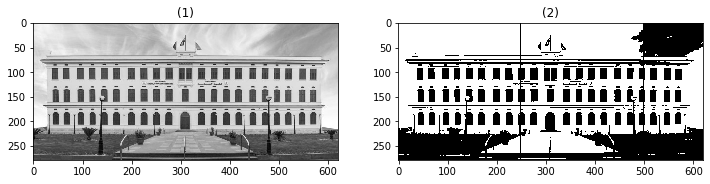

In [166]:
img1 = io.imread("book.png")
img2 = io.imread("book1.png")
img3 = io.imread("cameraman.png")
img4 = io.imread("cufe.png")
local(img1,50)
local(img2,10)
local(img3,10)
local(img4,10)

In [151]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8
